## Python : Seaborn for Visualization


Priyaranjan Mohanty

### Objective of this Kernel 

Objective of this kernel is to explore & explain the Seaborn package for Visualization.

Some of us who are already familiar with Matplotlib for visualization , might have a question on why do we need another visualization package , when we do already have Matplotlib.

Answer to that excllent question is -

For those who’ve tinkered with Matplotlib before, you may have wondered, “why does it take 10 lines of code just to make a decent-looking histogram?”

Well, if you’re looking for a simpler way to plot attractive charts, then you’ve come to right package - Seaborn. 

### Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state:

    If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

Above description is a pretty good summary of Seaborn’s strengths. 

In practice, the “well-defined set of hard things” includes:

    Using default themes that are aesthetically pleasing.
    Setting custom color palettes.
    Making attractive statistical plots.
    Easily and flexibly displaying distributions.
    Visualizing information from matrices and DataFrames.
    Those last three points are why Seaborn is our tool of choice for Exploratory Analysis. 
    It makes it very easy to “get to know” your data quickly and efficiently.

However, Seaborn is a complement, not a substitute, for Matplotlib. 

There are some tweaks that still require Matplotlib, and we shall cover the same in this kernel.

### Installing Seaborn 

Note - Seaborn is not shipped with base Python package and thus has to be installed before it can be used.

Let's import all the required packages for this Kernel

#### Import Pandas Package

In [1]:
# Pandas for managing datasets
import pandas as pd

#### import Matplotlib, which will help us customize our plots further.

Tip: In Jupyter Notebook, you can also include %matplotlib inline to display your plots inside your notebook.

In [2]:
# Matplotlib for additional customization

from matplotlib import pyplot as plt

%matplotlib inline

#### Install & import seaborn

In [3]:
# install seaborn

!pip install seaborn

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

Tip: we gave each of our imported libraries an alias. Later, we can invoke Pandas with pd, Matplotlib with plt, and Seaborn with sns.

Now , lets ingest the Data ( pokeman.csv ) into our Python Script / Kernel .

Tip: The argument  index_col=0 simply means we'll treat the first column of the dataset as the ID column.


In [4]:
# Read dataset
Pokemon_df = pd.read_csv('Pokemon_2.csv')

Lets see the content of the Dataset just read into Python

In [5]:
# Display first 5 observations
Pokemon_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,2,False
2,525,80,82,83,100,100,80,3,False
3,309,39,52,43,60,50,65,1,False
4,405,58,64,58,80,65,80,2,False


### Drawing a Scatter Plot .

In Seaborn , a scatter plot is just one line of code using the lmplot() function.

There are two ways you can do so.

    The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.

    The second way is to directly pass in Series of data to the axes arguments.
    
For example, let's compare the Attack and Defense stats for our Pokémon:

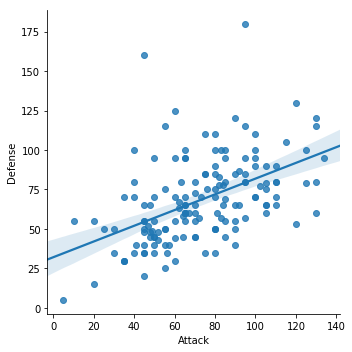

In [6]:
# Recommended way to draw a Scatter Plot from a Dataframe

sns.lmplot(x='Attack', y='Defense', data=Pokemon_df)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

    First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
    
    Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

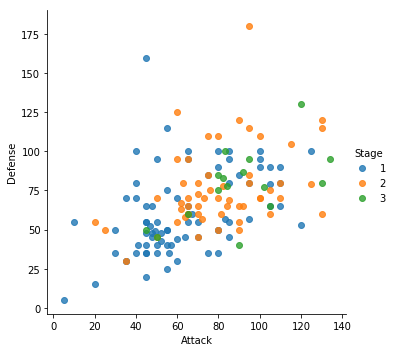

In [7]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', 
           data=Pokemon_df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

How can we customize the above plot ......

Remember, Seaborn is a high-level interface to Matplotlib. From our experience, Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

Text(0.5, 1.0, 'Scatter Plot using Seaborn Package')

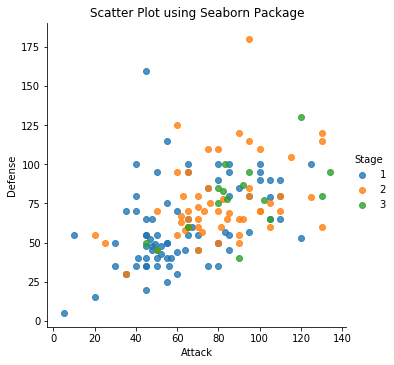

In [11]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', 
           data=Pokemon_df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

# Tweak using Matplotlib
plt.title('Scatter Plot using Seaborn Package')

Lets check next , what role Pandas play with seaborn package


Even though this is a Seaborn guide, Pandas actually plays a very important role. You see, Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.

For example, let's say we wanted to make a box plot for our Pokémon's combat stats:

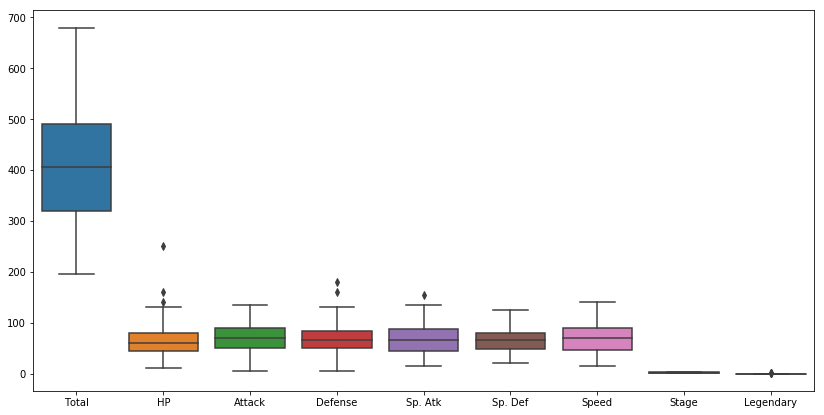

In [12]:
# Boxplot

plt.figure(figsize=(14,7))

sns.boxplot(data=Pokemon_df)



### Seaborn Themes 

Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

Next, we'll change the theme to 'whitegrid' while making a violin plot.

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.
For example, we can visualize the distribution of Attack by Pokémon's primary type:

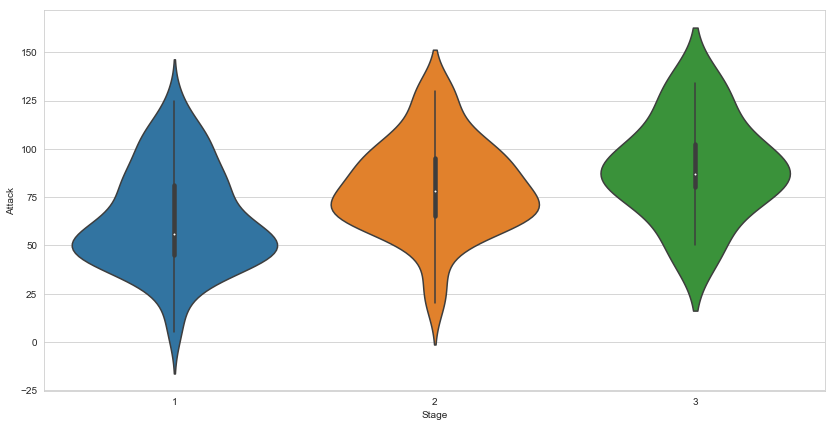

In [13]:
# Set theme

plt.figure(figsize=(14,7))

sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Stage', y='Attack', data=Pokemon_df)

#### Swarm plot 

This visualization will show each point, while "stacking" those with similar values:

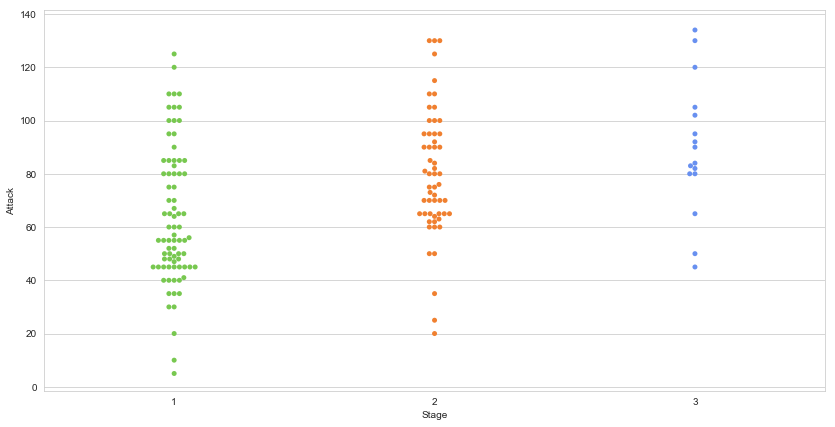

In [14]:
# Swarm plot with Pokemon color palette

pkmn_type_colors = ['#78C850',  # Stage 1 
                    '#F08030',  # Stage 2
                    '#6890F0'   # Stage 3
                   ]

plt.figure(figsize=(14,7))

sns.swarmplot(x='Stage', y='Attack', data=Pokemon_df, 
              palette=pkmn_type_colors)

#### Overlaying Plots 

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

    First, we'll make our figure larger using Matplotlib.
    Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
    Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
    Finally, we'll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Stage')

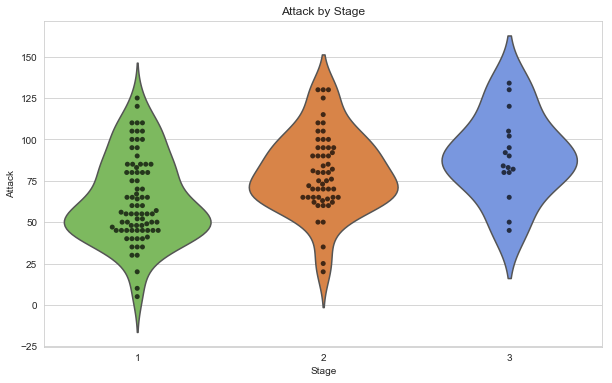

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Stage',
               y='Attack', 
               data=Pokemon_df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Stage', 
              y='Attack', 
              data=Pokemon_df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Stage')

#### Heatmap 

Using the Correlation Matric as input

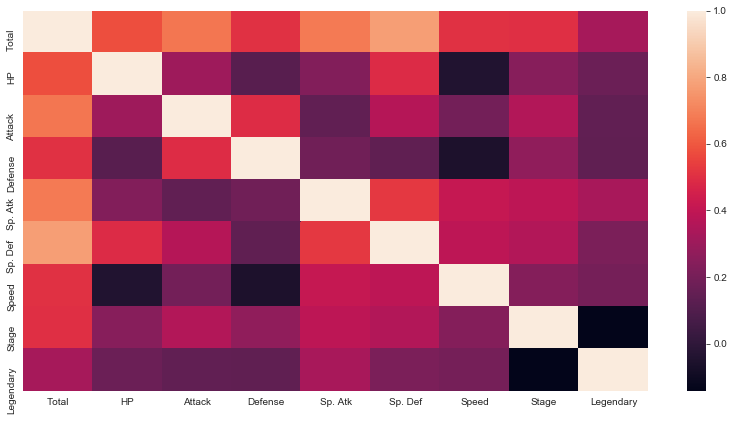

In [16]:
# Calculate correlations
corr = Pokemon_df.corr()

plt.figure(figsize=(14,7))

# Heatmap
sns.heatmap(corr)

#### Histogram

Histograms allow you to plot the distributions of numeric variables.

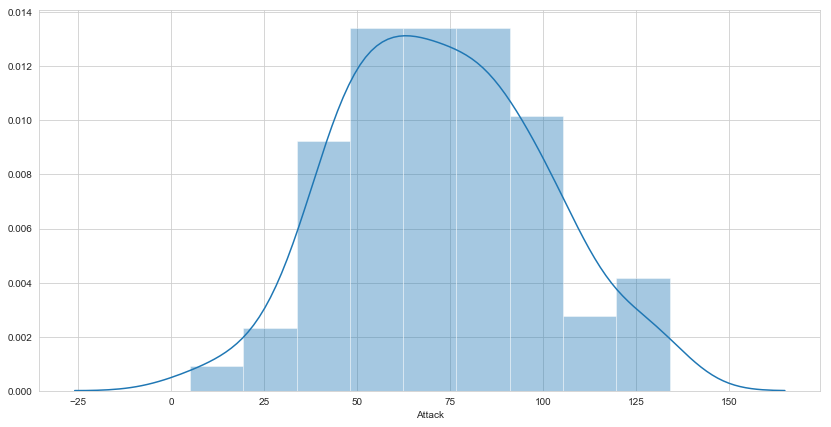

In [17]:
# Distribution Plot (a.k.a. Histogram)

plt.figure(figsize=(14,7))

sns.distplot(Pokemon_df.Attack)


#### Barplot 

Bar plots help you visualize the distributions of categorical variables.



(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

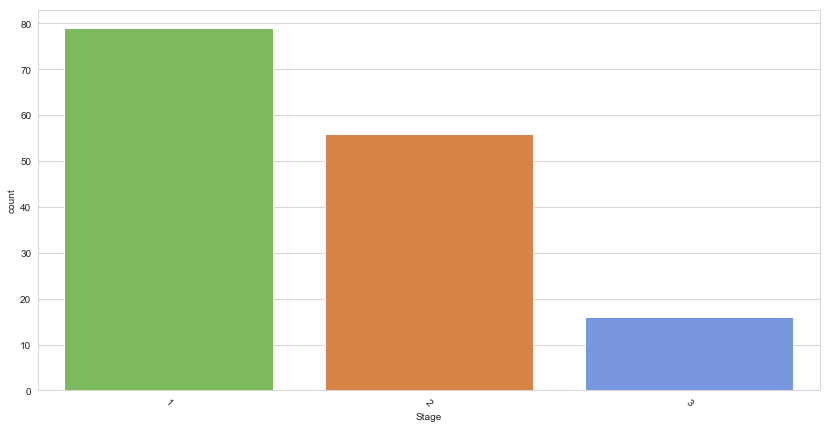

In [18]:
# Count Plot (a.k.a. Bar Plot)

plt.figure(figsize=(14,7))

sns.countplot(x='Stage', 
              data=Pokemon_df, 
              palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)